# Name: Reem Emad Ramadan
## Sec.: 1, B.N.: 33

# Assignment 1 (Coding Part)

- Implement the required code for each problem in the allocated area.
- Write down your comments clearly.
- Please submit your notebook with outputs displayed.

## Exercise 1.10

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def flip_coin():
    # TODO: add fair coin flipping experiment code
    # use bionomial distribution to simulate coin flipping experiment with 1 trial and a probability to be fair coin p = 0.5  
    # return 1 if heads and 0 if tails
    return np.random.binomial(1, 0.5)

In [3]:
def coin_simulation():
    # flip 1,000 fair coins
    # Flip each coin independently 10 times.   
    # Count results in each trial and store them in an array called results 
    # use a for loop to flip each coin 10 times
    results = np.zeros(1000)
    for i in range(1000):
        for j in range(10):
            results[i] += flip_coin()

    # focus on 3 coins as follows: 
    # c1 is that first coin flipped
    # crand is a coin you choose at random
    # cmin is the coin that has the minimum frequency of heads
    # (pick the earlier one in case of a tie)
    # ν1, νrand and ν min be the fraction of heads you obtain for the respective three coins.
    c1 = results[0]
    crand = results[np.random.randint(0, 1000)]
    cmin = results[np.argmin(results)]

    v1 = c1/10
    vrand = crand/10
    vmin = cmin/10

    μ1 = np.mean(results[0])/10
    μrand = np.mean(results[np.random.randint(0, 1000)])/10
    μmin = np.mean(results[np.argmin(results)])/10

    return v1, vrand, vmin, μ1, μrand, μmin


### Exercise 1.10 (a)

In [4]:
# TODO: add solution for point a
# The mean(mu) for the three coins selected above are: 
# μ1, μrand and μmin 
v1,_,_,μ1,μrand,μmin=coin_simulation()
print("μ for heads in the population is 0.5 for all coins because they are fair coins") 
print("μ1(for 1st coin) = ", μ1)
print("μrand = ", μrand)
print("μmin = ", μmin)

μ for heads in the population is 0.5 for all coins because they are fair coins
μ1(for 1st coin) =  0.8
μrand =  0.5
μmin =  0.0


### Exercise 1.10 (b)

In [13]:
# TODO: add solution for point b
# Repeat for 100,000 runs to get several instances of ν1, ν rand and ν min
# loop to get several(3) instances of ν1, ν rand and ν min
# put valuse of v into a list
v1_list = []
vrand_list = []
vmin_list = []

μ1_list = []
μrand_list = []
μmin_list = []

for i in range(100000):
    v1, vrand, vmin, μ1,μrand,μmin = coin_simulation()
    v1_list.append(v1)
    vrand_list.append(vrand)
    vmin_list.append(vmin)

    μ1_list.append(μ1)
    μrand_list.append(μrand)
    μmin_list.append(μmin)



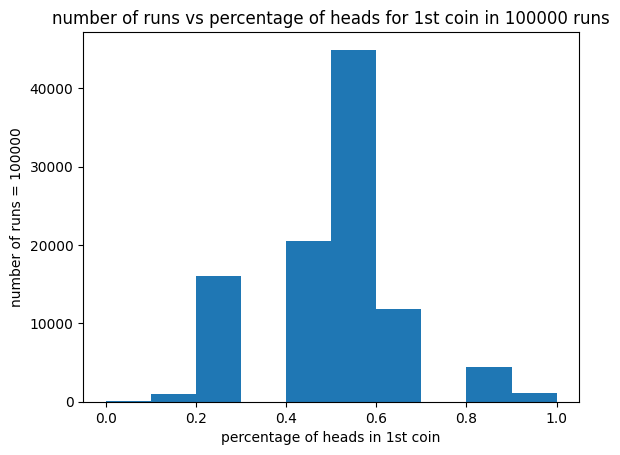

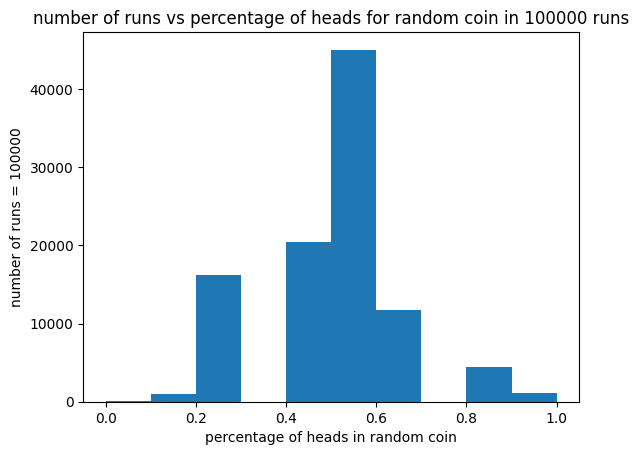

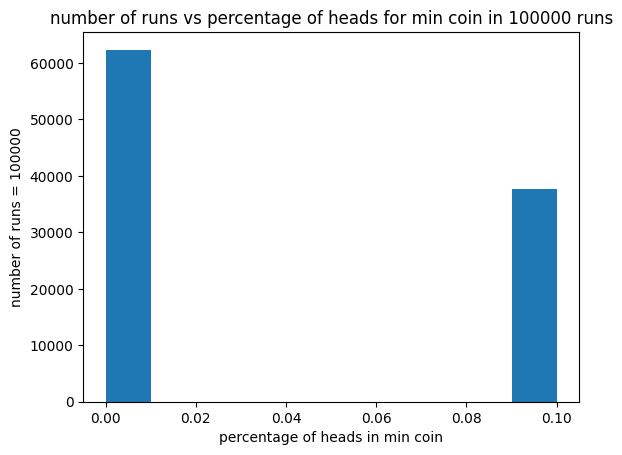

In [27]:
# plot number of runs on y-axis vs percentage of heads on x-axis 
#  plot the histograms of the distributions of ν1, ν rand and ν min

plt.hist(v1_list, bins=10)
# put labels on the plot
plt.ylabel('number of runs = 100000')
plt.xlabel('percentage of heads in 1st coin')
plt.title('number of runs vs percentage of heads for 1st coin in 100000 runs') 
plt.show()


plt.hist(vrand_list, bins=10)
# put labels on the plot
plt.ylabel('number of runs = 100000')
plt.xlabel('percentage of heads in random coin')
plt.title('number of runs vs percentage of heads for random coin in 100000 runs') 
plt.show()


plt.hist(vmin_list, bins=10)
# put labels on the plot
plt.ylabel('number of runs = 100000')
plt.xlabel('percentage of heads in min coin')
plt.title('number of runs vs percentage of heads for min coin in 100000 runs') 
plt.show()

### Exercise 1.10 (c)

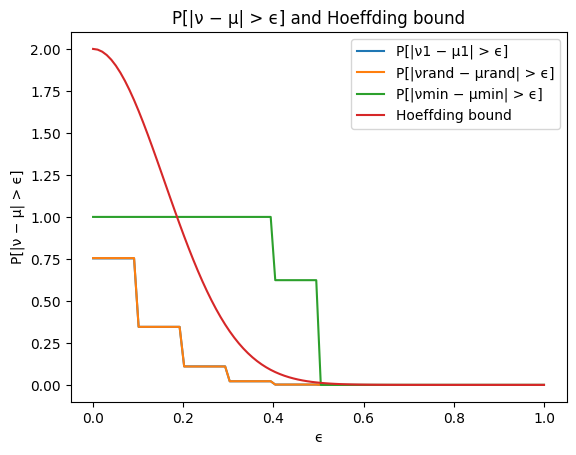

In [92]:
# TODO: add solution for point c
# Using (b), plot estimates of 𝑃[|ν − μ| > ϵ] as a function of ϵ, 
# together with the Hoeffding bound 2𝑒**−2N𝜖**2 (on the same graph)

# Hoeffding bound 2𝑒**−2N𝜖**2 
def hoeffding_bound(N, epsilon):
    # N: number of flips for a coin
    # print(2*np.exp(-2*N*epsilon**2))
    return 2*np.exp(-2*N*epsilon**2)

# 𝑃[|ν − μ| > ϵ]
def prob(v_b, μ_b, N, epsilon):
    # get the difference between ν and μ for each run and store them in an array called diff 
    diff = np.zeros(N) 
    for i in range(N):
        diff[i] = abs(v_b[i] - μ_b)
    # count the number of times the absolute difference is greater than epsilon
    count = [] # count the number of times the absolute difference is greater than epsilon for each epsilon value in the array epsilon
    # use a for loop to count the number of times the absolute difference is greater than epsilon for each epsilon value in the array epsilon 
    for i in range(len(epsilon)):
        for j in range(N):
            if diff[j] > epsilon[i]: 
                count.append(1)
            else:
                count.append(0)
    # divide the number of times the absolute difference is greater than epsilon by the total number of runs
    prob = np.zeros(len(epsilon))
    for i in range(len(epsilon)):
        prob[i] = np.sum(count[i*N:(i+1)*N])/N
    return prob

# define epsilon to be from 0 to 1 with step size 0.01
epsilon = np.linspace(0, 1, 100)
# print(epsilon)


# The Hoeffding bound is an upper bound on the probability that the difference between the mean of a random variable and the expected value of the random variable is greater than a given value.
# plot 𝑃[|ν − μ| > ϵ] and Hoeffding bound 2𝑒**−2N𝜖**2 on the same graph
# Mu is the probability of heads in real population which is known as 0.5
plt.plot(epsilon, prob(v1_list,0.5,100000, epsilon), label="P[|ν1 − μ1| > ϵ]")
plt.plot(epsilon, prob(vrand_list,0.5,100000, epsilon), label="P[|νrand − μrand| > ϵ]")
plt.plot(epsilon, prob(vmin_list,0.5,100000, epsilon), label="P[|νmin − μmin| > ϵ]")

plt.plot(epsilon, hoeffding_bound(10, epsilon), label="Hoeffding bound")
plt.title("P[|ν − μ| > ϵ] and Hoeffding bound")
# put labels on the plot
plt.xlabel('ϵ')
plt.ylabel('P[|ν − μ| > ϵ]')
plt.legend()
plt.show()


### Exercise 1.10 (d)

In [ ]:
# TODO: add solution for point d
# From previous graph, which coins obey the Hoeffding bound?, which ones do not? Explain why
# Hoeffding bound = 2𝑒**−2N𝜖**2
# P[|ν − μ| > ϵ] <= 2𝑒**−2N𝜖**2
# The coins that obey the Hoeffding bound are ν1 and νrand(they are typical on each other). The coin νmin does not obey the Hoeffding bound.
# νmin does not obey the Hoeffding bound because it is computed after flipping all coins so it depends on the dataset(population) while v1 and vrand are computed after flipping only one coin so they are independent of the dataset(population).
# The Hoeffding bound is an upper bound on the probability that the difference between the mean of a random variable(v) and the expected value of the random variable(mu) is greater than a given value in the epslion array.

### Exercise 1.10 (e)

In [5]:
# TODO: add solution for point e
# Relate part (d) to the multiple bins  depict the learning problem with M hypotheses
# Answer: 
# When we're getting the hypothesis that gets min. error(vmin), it's not from random sample, we see all the population, then get it.
# while v1 and vrand are computed before knowing the whole population, so they are independent of the dataset(population).
# All possible flips : population (input space X)
# The 100,000 runs which are the multible bins(multiple hypothesis), trials where we flip all coins 10 times for analysis.
# The sample is 10 flips for each coin in the 1000 coin.
# The coins are bins -> hypothesis.
# The Hoeffding bound is an upper bound on the probability that the difference between the mean of a random variable(v) and the expected value of the random variable(mu) is greater than a given value in the epslion array.


## Problem 1.4

### Problem 1.4 (a)

In [6]:
def generate_dataset(N, d):
    # TODO: add dataset generation code
    # Generate a linearly separable data set of size 20 with two features d=2
    # then generate N random data points {xi ∈ 𝑅**d | i = 1, . . . , N} and labels yi = f(xi)} for each point.
    # where f(x) = sign(x1 + x2 − 0.25)
    # return the data points and labels

    # generate N random data points with d features
    x = np.random.uniform(-1,1,(N,d))

    # generate 20 random labels
    y = np.zeros(N)
    for i in range(N):
        if x[i,0] + x[i,1] - 0.25 > 0:
            y[i] = 1
        else:
            y[i] = -1
    return x, y


In [7]:
# Plot the examples {𝑥𝑛} as well as the target function f on a plane (2D)
def plot_dataset(x, y): 
    # plot x points with y labels 

    # plot the points with y labels
    for i in range(len(y)):
        if y[i] == 1:
            plt.plot(x[i,0], x[i,1], 'ro')
        else:
            plt.plot(x[i,0], x[i,1], 'bo')

    # plot the target function f(x) to separate the points
    x1 = np.linspace(-1,1,100)
    x2 = 0.25 - x1
    plt.plot(x1, x2, 'g-', label='target function')
    # put legend on the plot
    plt.legend()
    # put labels on the plot
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.title('20 random data points with labels and target function')
    


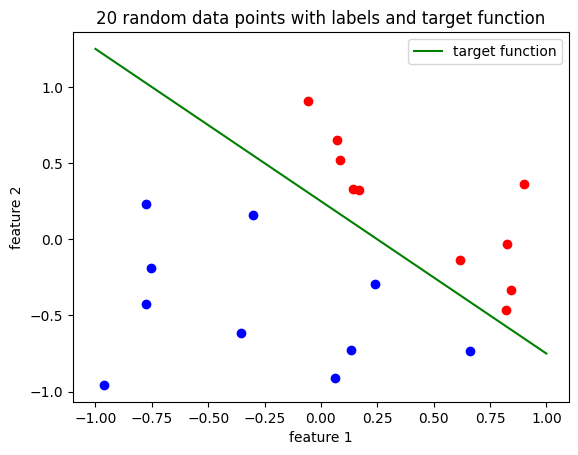

In [8]:
x, y = generate_dataset(20,2)
plot_dataset(x, y)
plt.show()

### Problem 1.4 (b)

In [9]:
def run_perceptron_learning(x,y,d, show = True):
    # TODO: add perceptron learning algorithm code
    # Run the perceptron learning algorithm on the data set generated in part (a)
    # return the Number of updates until convergence the algorithm takes to converge

    # initialize the weight vector w to be a vector of zeros
    w = np.zeros(d+1) # 3 because we have d features and 1 bias
    # initialize the Number of updates until convergence to 0
    updates = 0
    # initialize the number of misclassified points to 1
    misclassified = 1
    # repeat until all points are correctly classified
    while misclassified != 0:
        # initialize the number of misclassified points to 0
        misclassified = 0
        # for each point in the data set
        for i in range(len(y)):
            # if negative then different signs between correct label and label by perceptron (misclassified)
            
            if y[i]*(w[0]*x[i,0] + w[1]*x[i,1] + w[2]) <= 0: 
                # update the weight vector
                w[0] = w[0] + y[i]*x[i,0]
                w[1] = w[1] + y[i]*x[i,1]
                w[2] = w[2] + y[i]
                # increment the Number of updates until convergence
                updates += 1
                # increment the number of misclassified points
                misclassified += 1
    # construct the final hypothesis g = sign(wTx) which is the perceptron line that separates the data points
    # g = np.sign(w[0]*x[:,0] + w[1]*x[:,1] + w[2])

    if show:
        # plot the data points and the final hypothesis g and the target function f
        # plot g 
        x1 = np.linspace(-1,1,100)
        x2 = -(w[0]*x1 + w[2])/w[1]
        plt.plot(x1, x2, 'y-', label='perceptron line')
        # put legend and title for each separator line
        plt.legend()
        # plot the data points
        plot_dataset(x, y)
        plt.show()
    return updates

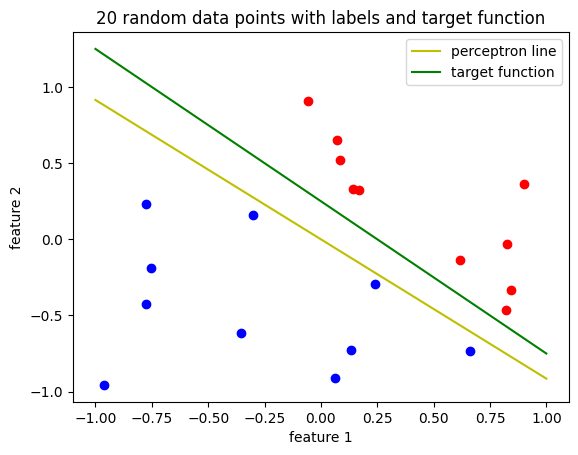

Number of updates until convergence:  2


In [10]:
# TODO: add solution for the rest of the point
updates = run_perceptron_learning(x,y,2)
print("Number of updates until convergence: ", updates)


In [32]:
# From the graph, traget function and perceptron line are close to each other.

### Problem 1.4 (c)

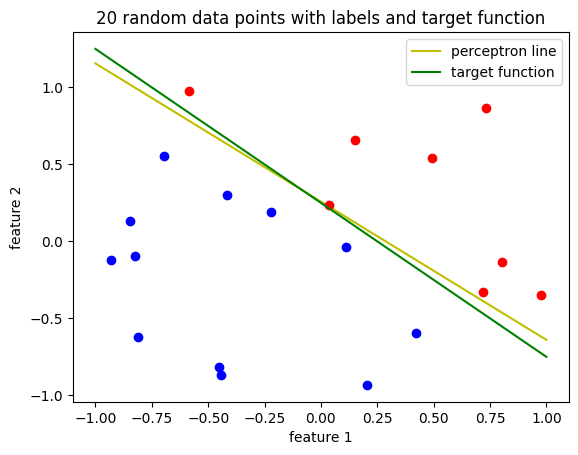

Number of updates until convergence:  41


In [7]:
# TODO: add solution for point c
x_new,y_new = generate_dataset(20,2)
updates = run_perceptron_learning(x_new,y_new,2)
print("Number of updates until convergence: ", updates)

# C differs from B because the data points are different(random). The target function and the perceptron line are still close to each other and still can classify correctly.

### Problem 1.4 (d)

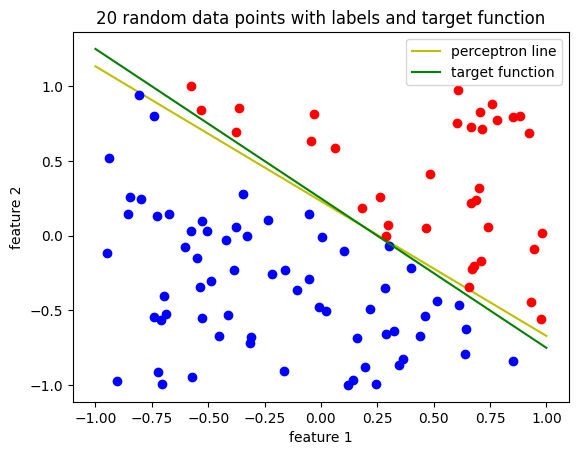

Number of updates until convergence:  39


In [8]:
# TODO: add solution for point d
# Run the perceptron learning algorithm on the data set generated in part (a) for 100 points
x_100,y_100 = generate_dataset(100,2)
updates = run_perceptron_learning(x_100,y_100,2)
print("Number of updates until convergence: ", updates)

# perceptron and target function are more close to each other than in B because the data points are more than B then more train to best fit to them
# but this consumes more time to train and more computation, then updates are more than B.

### Problem 1.4 (e)

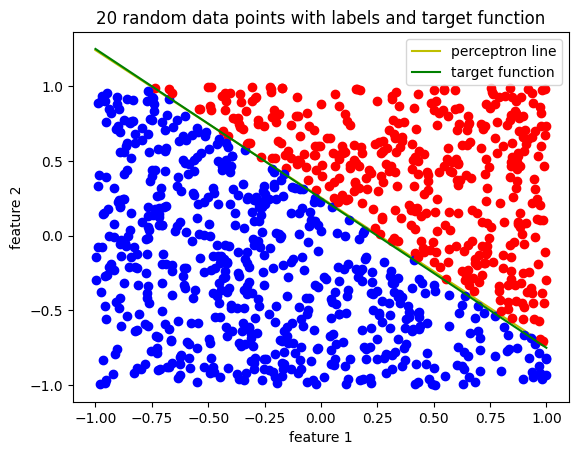

Number of updates until convergence:  584


In [12]:
# TODO: add solution for point e
# Run the perceptron learning algorithm on the data set generated in part (a) 1000 points
x_1000,y_1000 = generate_dataset(1000,2)
updates = run_perceptron_learning(x_1000,y_1000,2)
print("Number of updates until convergence: ", updates)

# too many points and updates than all before, the perceptron line is about typical to the target function.

In [16]:
def run_perceptron_learning_general_d(x,y,d):
    # TODO: add perceptron learning algorithm code
    # Run the perceptron learning algorithm on the data set generated in part (a)
    # return the Number of updates until convergence the algorithm takes to converge

    # initialize the weight vector w to be a vector of zeros
    w = np.zeros(d+1) # d features and 1 bias
    # initialize the Number of updates until convergence to 0
    updates = 0
    # initialize the number of misclassified points to 1
    misclassified = 1
    num_iteration = 0
    # repeat until all points are correctly classified
    while misclassified != 0:
        randomize = np.random.permutation(len(y))
        x = x[randomize]
        y = y[randomize]
        num_iteration += 1
        # initialize the number of misclassified points to 0
        misclassified = 0
        # for each point in the data set
        for i in range(len(y)):
            # if negative then different signs between correct label and label by perceptron (misclassified)
            weights = 0
            for j in range(d):
                weights += w[j]*x[i,j] 
            weights += w[d] 
            if y[i]*weights <= 0: 
                # update the weight vector
                for j in range(d):
                    w[j] = w[j] + y[i]*x[i,j]
                w[d] = w[d] + y[i]
                # increment the Number of updates until convergence
                updates += 1
                # increment the number of misclassified points
                misclassified += 1
    return updates, num_iteration

### Problem 1.4 (f)

In [17]:
# d=10, data set of size N = 1,000
x_1000_10,y_1000_10 = generate_dataset(1000,10)

In [18]:
updates,_ = run_perceptron_learning_general_d(x_1000_10,y_1000_10,10)
print("Number of updates until convergence: ", updates)

Number of updates until convergence:  6999


### Problem 1.4 (g)

0 : Number of updates until convergence:  5805
1 : Number of updates until convergence:  4126
2 : Number of updates until convergence:  6204
3 : Number of updates until convergence:  6170
4 : Number of updates until convergence:  8091
5 : Number of updates until convergence:  7472
6 : Number of updates until convergence:  6999
7 : Number of updates until convergence:  5657
8 : Number of updates until convergence:  3930
9 : Number of updates until convergence:  6236
10 : Number of updates until convergence:  6673
11 : Number of updates until convergence:  3565
12 : Number of updates until convergence:  6412
13 : Number of updates until convergence:  6785
14 : Number of updates until convergence:  5250
15 : Number of updates until convergence:  6815
16 : Number of updates until convergence:  5536
17 : Number of updates until convergence:  7017
18 : Number of updates until convergence:  6356
19 : Number of updates until convergence:  6234
20 : Number of updates until convergence:  5661
21

(array([ 5.,  6.,  9.,  7., 18., 20., 13.,  9.,  7.,  6.]),
 array([157., 229., 301., 373., 445., 517., 589., 661., 733., 805., 877.]),
 <BarContainer object of 10 artists>)

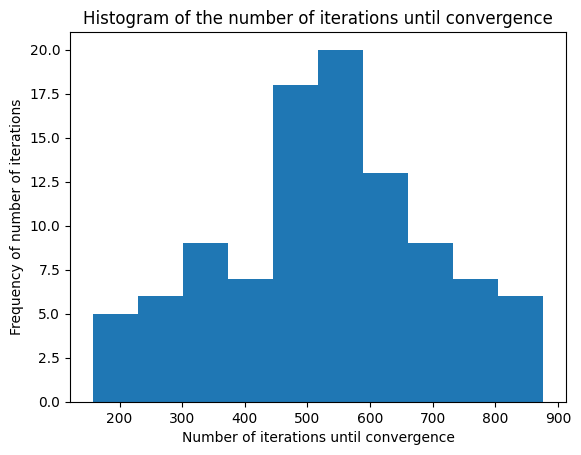

In [19]:
# d=10, data set of size N = 1,000, for 100 experiments
num_iterations = []
for i in range(100):
    updates,num_iteration = run_perceptron_learning_general_d(x_1000_10,y_1000_10,10)
    print(str(i),": Number of updates until convergence: ", updates)
    num_iterations.append(num_iteration)

# plot histogram of the number of iterations until convergence
# put labels and title
plt.xlabel('Number of iterations until convergence')
plt.ylabel('Frequency of number of iterations')
plt.title('Histogram of the number of iterations until convergence')
plt.hist(num_iterations)

# hirstogram is similar to normal distribution.


### Problem 1.4 (h)

In [11]:
# Summarize your conclusions with respect to accuracy and running time as a function of d and N. 
# Increasing iterations and dataset, increases the accuracy(g approximates to target function) and increases the running time(# of updates to converge).
# The number of updates until convergence is increasing with increasing with the number of sample points N.
